In [1]:
# import library 

import pandas as pd
import seaborn as sns
sns,set()

from matplotlib import pyplot as plt
from sklearn.model_selection import *
from sklearn.metrics import *

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("C:/Users/admin/Downloads/train.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.shape

(891, 12)

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
(train_data.isnull().sum()/(len(train_data)))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
s1=train_data.Survived.sum()
s1

342

In [12]:
total=train_data.Survived.count()
total

891

In [13]:
not_survived= total-s1
not_survived

549

[Text(0.5, 0, 'Survival status '),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'Survival status')]

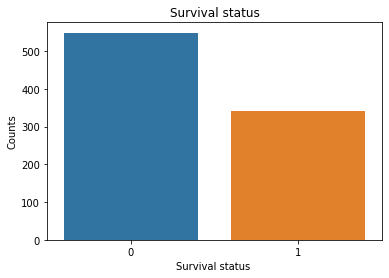

In [14]:
sns.countplot(data=train_data , x='Survived').set(xlabel='Survival status ',ylabel='Counts',title='Survival status')

Total number of persons are 891 out of these servived are 342 and not servived are 549.

[Text(0.5, 0, 'Survival status'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'Genderwise distribution of survival status')]

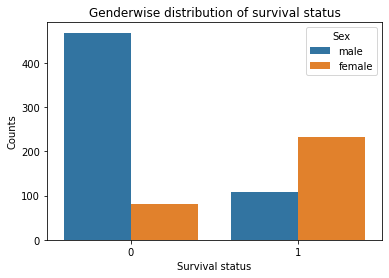

In [15]:
sns.countplot(data=train_data , x='Survived', hue='Sex').set(xlabel='Survival status',ylabel='Counts',title='Genderwise distribution of survival status')

Out of survived persons females are more than mens. from population of not survived males are more than females.

[Text(0.5, 0, 'Ticket class '),
 Text(0, 0.5, 'Age in years'),
 Text(0.5, 1.0, 'Agewise distribution of Ticket Class')]

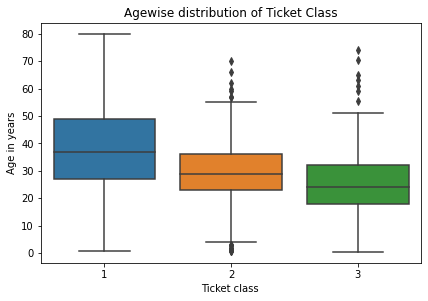

In [16]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,6)
sns.boxplot(x='Pclass',y='Age',data=train_data).set(xlabel='Ticket class ',ylabel='Age in years',title='Agewise distribution of Ticket Class')

1st class is approximately symmetric, because both half-boxes are almost the same length almost all age groupd people were travel in First class.

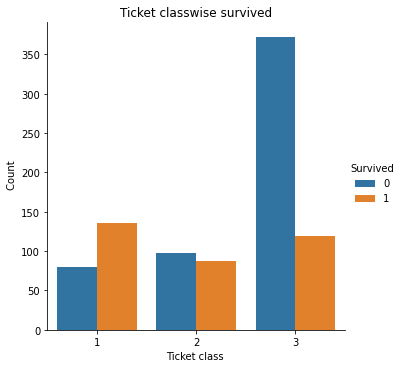

In [17]:
sns.catplot(x='Pclass',hue='Survived',kind='count',data=train_data).set(xlabel='Ticket class ',ylabel=' Count',title='Ticket classwise survived')

Number of survived are more from first class More number of people not survived are belong to third class.

[Text(0.5, 0, 'Survival status'), Text(0.5, 1.0, 'Survived KDE Plot')]

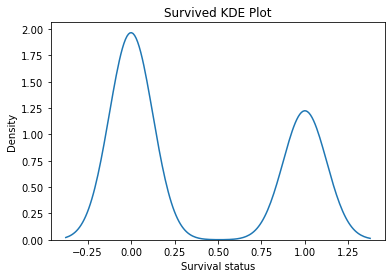

In [18]:
sns.kdeplot(data=train_data, x="Survived").set(xlabel='Survival status',title='Survived KDE Plot')

Distribution of Not survived lies between -0.25 to 0.25 and survived are 0.75 to 1.25

In [19]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = (sum(women)/len(women))*100

print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095


In [21]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = (sum(men)/len(men))*100

print("% of men who survived:", rate_men)

% of men who survived: 18.890814558058924


In [22]:
from scipy.stats import pearsonr
corr, _ = pearsonr(train_data['Pclass'],train_data['Survived'])
corr

-0.33848103596101514

In [23]:
train_data['Pclass'].corr(train_data['Survived'])

-0.3384810359610148

In [24]:
corr= pearsonr(train_data['Survived'],train_data['Pclass'])
corr

PearsonRResult(statistic=-0.33848103596101514, pvalue=2.5370473879790813e-25)

In [25]:
#Replacing null values in Age column
def new_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return train_data[train_data['Pclass']==1]['Age'].median()
        elif Pclass==2:
            return train_data[train_data['Pclass']==2]['Age'].median()
        elif Pclass==3:
            return train_data[train_data['Pclass']==3]['Age'].median()
    else:
        return Age
        

In [26]:
def mapping_data(train_data):
  train_data.Sex=train_data.Sex.map({'female':0, 'male':1})
  train_data.Embarked=train_data.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})
  return train_data

In [27]:
def preprocessing(train_data,data_type):
  if data_type=='train':
    train_data['Age']=train_data[['Age','Pclass']].apply(new_age,axis=1)
    train_data = mapping_data(train_data)
    train_data.drop('Cabin',axis=1,inplace=True)
    train_data.dropna(inplace=True)
    train_data.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)
    min_age=min(train_data.Age)
    max_age=max(train_data.Age)
    min_fare=min(train_data.Fare)
    max_fare=max(train_data.Fare)
    train_data.Age = (train_data.Age-min_age)/(max_age-min_age)
    train_data.Fare = (train_data.Fare-min_fare)/(max_fare-min_fare)
    x_data=train_data.drop('Survived',axis=1)
    y_data=train_data['Survived']
  
    return x_data,y_data
  else:
    train_data['Age']=train_data[['Age','Pclass']].apply(new_age,axis=1)
    train_data = mapping_data(train_data)
    train_data.drop('Cabin',axis=1,inplace=True)
    train_data.dropna(inplace=True)
    train_data.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)
    min_age=min(train_data.Age)
    max_age=max(train_data.Age)
    min_fare=min(train_data.Fare)
    max_fare=max(train_data.Fare)
    train_data.Age = (train_data.Age-min_age)/(max_age-min_age)
    train_data.Fare = (train_data.Fare-min_fare)/(max_fare-min_fare)
    # x_data=train_data.drop('Survived',axis=1)
  
    return train_data

In [28]:
x_data,y_data = preprocessing(train_data,'train')

In [29]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,0
1,1,1,0,0.472229,1,0,0.139136,1
2,1,3,0,0.321438,0,0,0.015469,0
3,1,1,0,0.434531,1,0,0.103644,0
4,0,3,1,0.434531,0,0,0.015713,0


In [30]:
cor=train_data.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.541585,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,0.127741,-0.405549,0.081656,0.016824,-0.548193
Sex,-0.541585,0.127741,1.000000,0.083730,-0.116348,-0.247508,-0.179958
Age,-0.052051,-0.405549,0.083730,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.034040,0.081656,-0.116348,-0.242807,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.247508,-0.170089,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,-0.179958,0.120938,0.160887,0.217532,1.000000


[Text(0.5, 1.0, 'correlation matrix')]

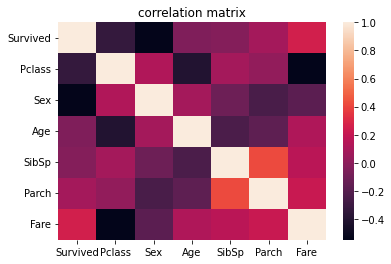

In [31]:
sns.heatmap(cor).set(title='correlation matrix')

Gender is negatively correlated with Survival status and Pacenger class. 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.2, random_state=0, stratify=y_data)

In [34]:
#To Create the model
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()

In [36]:
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [37]:
def prediction(test_df_path):
  df = pd.read_csv(test_df_path)
  df = preprocessing(df,'test')
  prediction = model.predict(df)
  df['predicted_survived'] = prediction
  return df

In [38]:
test_df = prediction("C:/Users/admin/Downloads/test.csv")

In [39]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predicted_survived
0,3,1,0.452723,0,0,0.015282,2,0
1,3,0,0.617566,1,0,0.013663,0,0
2,2,1,0.815377,0,0,0.018909,2,0
3,3,1,0.353818,0,0,0.016908,0,0
4,3,0,0.287881,1,1,0.023984,0,1
...,...,...,...,...,...,...,...,...
413,3,1,0.001666,0,0,0.015713,0,0
414,1,0,0.512066,0,0,0.212559,1,1
415,3,1,0.505473,0,0,0.014151,0,0
416,3,1,0.001666,0,0,0.015713,0,0


In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [41]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       110
           1       0.81      0.79      0.80        68

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [42]:
print ("Accuracy : ", accuracy_score(y_test_data, predictions))

Accuracy :  0.848314606741573


In [43]:
# predict probabilities
probs = model.predict_proba(x_training_data)[:, 1]

In [44]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_training_data, probs)

In [45]:
# calculate AUC score
auc_score = roc_auc_score(y_training_data, probs)

In [46]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_training_data, probs)

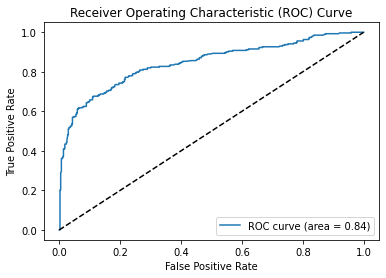

In [47]:
# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

Area under the ROC curve = 0.84
The average value of specificity for all possible value of sensitivity.

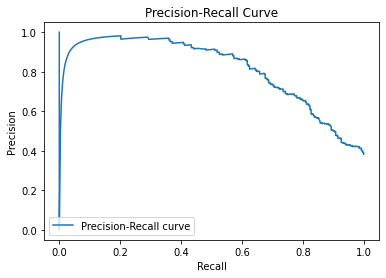

In [48]:
# plot precision-recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")